## Exploring BMI Trends: A Comparative Analysis of Male and Female Attributes

### Abstract
In this task, we are going to use datasets that represent different physical attributes of males and females (seperate) such as height, weight etc. and then calculate the BMIs for each instance of males and females respectively. Then the BMIs are going to be visualized using histograms, box and whisker plots and using various aggregate functions for analysis. Then the original datasets with the BMIs are standardized and used to calculate the Spearman and Pearsons correlation among each columns (features). 

#### Importing Libraries and Modules 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
female_data = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv",
    comment="#")
male_data = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv",
    comment="#")

#### Storing the male and female data

In [4]:
female = female_data.to_numpy()
male = male_data.to_numpy()

### Calculating and storing BMIs to the dataset

In [7]:
# calculating BMIs for the female dataset
female_bmis=[]
male_bmis=[]
bmi=0
for i in range (len(female)):
    bmi= (female[i,0]) / (((female[i,1])/100)**2)
    female_bmis.append(bmi)
female_bmis=np.array(female_bmis)

In [8]:
# calculating BMIs for the male dataset
bmi=0
for i in range (len(male)):
    bmi= (male[i,0]) / (((male[i,1])/100)**2)
    male_bmis.append(bmi)
male_bmis=np.array(male_bmis)

In [9]:
# Adding BMIs column to the dataset
female = np.column_stack((female, female_bmis))
male = np.column_stack((male, male_bmis))

### Histogram for Male and Female BMIs 

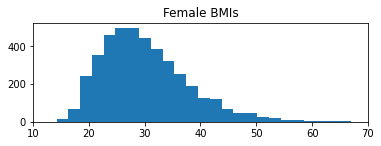

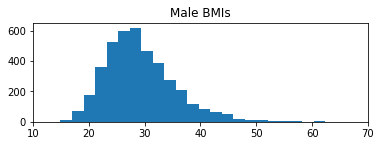

In [15]:
plt.subplot(211)
plt.hist(female_bmis, bins=25)
plt.title('Female BMIs')
plt.xlim(10,70)
plt.show()

plt.subplot(212)
plt.hist(male_bmis , bins=25)
plt.title('Male BMIs')
plt.xlim(10,70)
plt.show()

### Box and Whisker plot for Male and Female BMIs

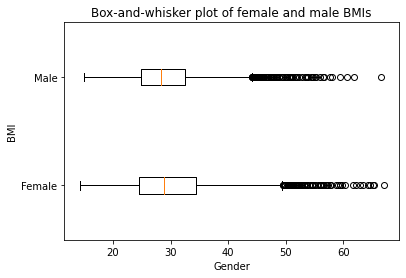

In [129]:
BMIs = [female_bmis, male_bmis]
fig, ax = plt.subplots()
ax.boxplot(BMIs, vert=False)
ax.set_xlabel('Gender')
ax.set_ylabel('BMI')
ax.set_yticklabels(['Female', 'Male'])
ax.set_title('Box-and-whisker plot of female and male BMIs')
plt.show()

### Calculating IQR for Male and Female BMI Data

In [16]:
male_IQR=np.quantile(male_bmis,0.75) - np.quantile(male_bmis,0.25)
female_IQR=np.quantile(female_bmis,0.75) - np.quantile(female_bmis,0.25)

#### Printing various aggregate functions describing the BMIs dataset for Male and Female

In [21]:
print(f"##            female    male")
print(f"## BMI mean:   {np.round(np.mean(female_bmis),2)}     {np.round(np.mean(male_bmis),2)}")
print(f"## Min:        {np.round(np.min(female_bmis),2)}     {np.round(np.min(male_bmis),2)}")
print(f"## Median:     {np.round(np.median(female_bmis),2)}    {np.round(np.median(male_bmis),2)}")
print(f"## Max:        {np.round(np.max(female_bmis),2)}    {np.round(np.max(male_bmis),2)}")
print(f"## Std:        {np.round(np.std(female_bmis),2)}     {np.round(np.std(male_bmis),2)}")
print(f"## IQR:        {np.round(female_IQR,2)}    {np.round(male_IQR,2)}")
print(f"## Skew:       {np.round(skew(female_bmis),2)}     {np.round(skew(male_bmis),2)}")

##            female    male
## BMI mean:   30.1     29.14
## Min:        14.2     14.91
## Median:     28.89    28.27
## Max:        67.04    66.5
## Std:        7.76     6.31
## IQR:        10.01    7.73
## Skew:       0.92     0.97


### Inference from the plots : 
* It can be observed that both male and female BMIs data are right skewed (positive skewed), the male dataset being slightly more skewed than the female one. 
* From the standard deviation aggregate function, it is clear that female data for BMIs are more dispersed as their standard deviation is higher than the respective male one.
* IQR (inter-quantile-range) is larger for the female dataset, meaning that the majority of the datapoints in the male version are closely packed to each other compared to the female version. 

#### Visualizing a Pairplot for the Female Dataset (Correlation)

In [35]:
from scipy.stats import zscore

# Standardize all columns of female data
zfemale = zscore(female, axis=0)

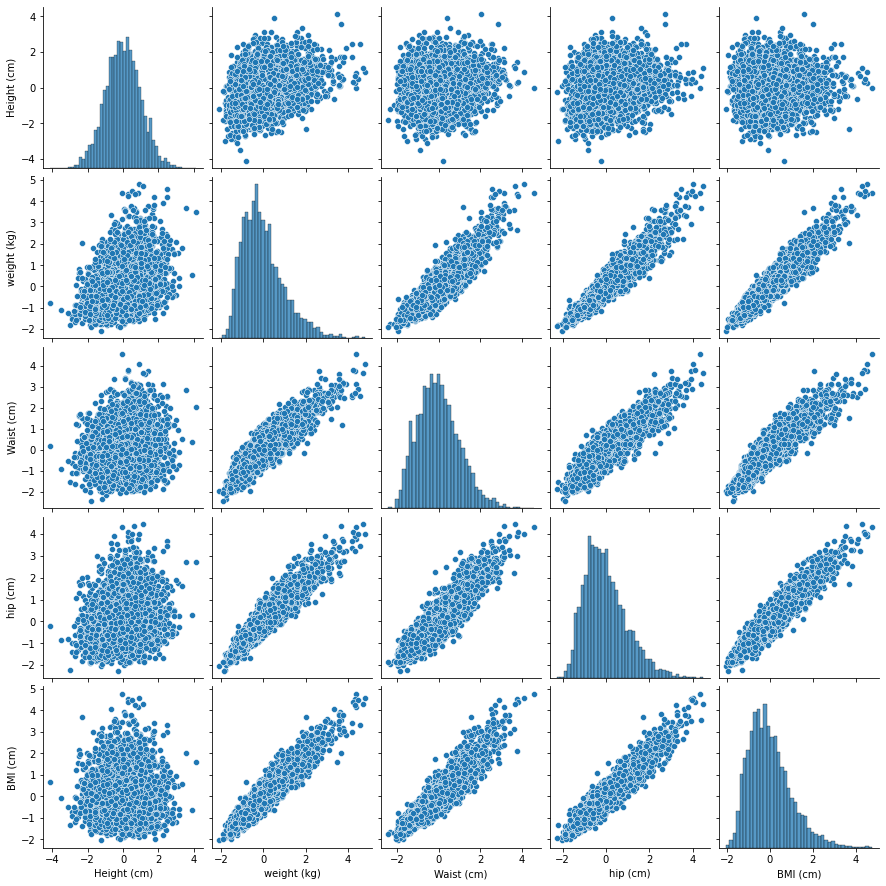

In [40]:
# Selecting the appropriate Columns
zdata = pd.DataFrame(zfemale[:,[1,0,6,5,7]],
                     columns = ["Height (cm)","weight (kg)","Waist (cm)", "hip (cm)", "BMI (cm)"])
# Pairplot
sns.pairplot(zdata)
plt.show()

In [ ]:
# Converting the dataset to numpy format
zdata=zdata.to_numpy()

#### Calculating the Pearson and Spearman correlations for the dataset

In [43]:
from scipy.stats import pearsonr, spearmanr
pearson_corr = np.zeros((5, 5))
spearman_corr = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        pearson_corr[i, j] = pearsonr(zdata[:, i], zdata[:, j])[0]
        spearman_corr[i, j] = spearmanr(zdata[:, i], zdata[:, j])[0]

#### Plotting the Spearman and Pearson correlations for the dataset using a Heatmap

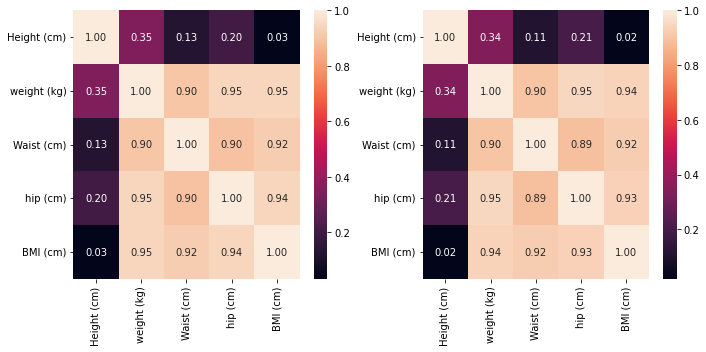

In [44]:
order = [0, 1, 2, 3, 4]
cols = np.array(["Height (cm)","weight (kg)","Waist (cm)", "hip (cm)", "BMI (cm)"])
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
# pearson correlation
sns.heatmap(
    pearson_corr[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt=".2f")
plt.tight_layout()

#spearman correlation
plt.subplot(122)
sns.heatmap(
    spearman_corr[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

### Conclusion
In conclusion, we calculated the BMIs for the male and female datasets and used aggregate functions to analyse the dataset, inferring that female BMIs are more dispersed compared to male BMIs. After standardizing the female dataset, we used a heatmap to visualize the calculated spearman and pearson correlation for each column, inferring that features such as weight has a much stronger correlation with features such as waist, hip size and BMI rather than features such as height.